In [40]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegressionCV

import matplotlib.pyplot as plt
import matplotlib.style
from matplotlib import cm
from matplotlib.ticker import LinearLocator



plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format='retina'

# Logistic Regression: The Standard Approach
Logistic regression is often taught as follows: We begin with a vector space, say $\mathbb{R}^2$, that has some points in it. These points belong to a specific class. We can say they these points were generated as follows:

$$A \sim N([-2, -2])$$
$$B \sim N([2, 2])$$


In [37]:
c1_dist = np.random.multivariate_normal([-2, -2], cov=[[3, 0 ], [0, 3]], size=100)
c2_dist = np.random.multivariate_normal([2, 2], cov=[[3, 0 ], [0, 3]], size=100)

df1 = pd.DataFrame({'x1': c1_dist[:, 0], 'x2': c1_dist[:, 1], 'label': 0})
df2 = pd.DataFrame({'x1': c2_dist[:, 0], 'x2': c2_dist[:, 1], 'label': 1})

df = pd.concat([df1, df2])

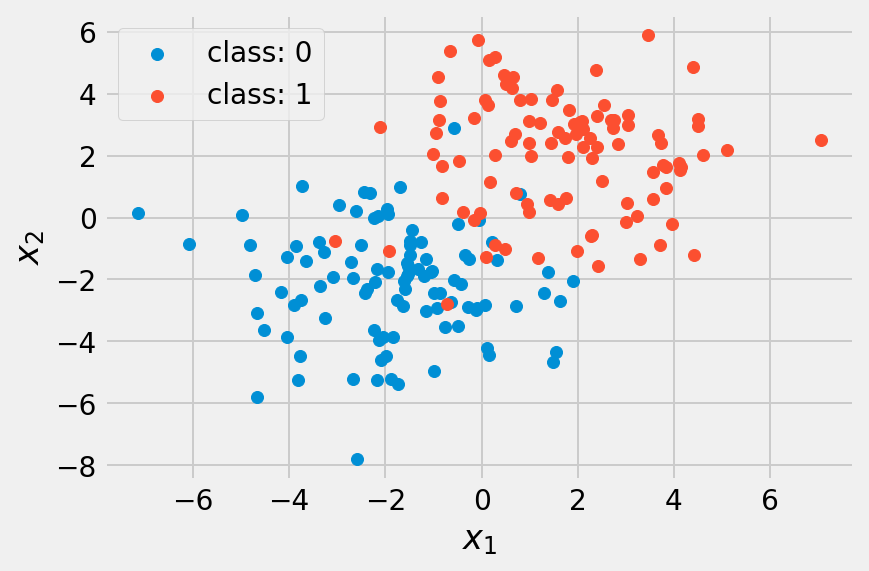

In [39]:
plt.scatter(df[df.label == 0].x1, df[df.label == 0].x2, label='class: 0')
plt.scatter(df[df.label == 1].x1, df[df.label == 1].x2, label='class: 1')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

We are then introduced to a model that is meant to learn from the data and provide the following relationship:

$$p(y \mid x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$$

We can use sklearn to quickly show what the end result will be:

In [55]:
X = df[['x1', 'x2']]
y = df[['label']]

In [42]:
clf = LogisticRegressionCV()

clf.fit(X, y)

/Users/nathanieldake/development/data-science/intuitiveml/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

In [86]:
x1.max()

7.059601380134306

In [88]:
x1_axis = np.arange(x1.min(), x1.max(), 0.01)
x2_axis = np.arange(x2.min(), x2.max(), 0.01)



In [89]:
x1, x2 = np.meshgrid(x1_axis, x2_axis)

In [90]:
coord1, coord2 = x1.ravel(), x2.ravel()

In [91]:
input_space = np.array([
    coord1, coord2
]).T

In [92]:
coord1.shape

(1946770,)

In [93]:
preds = clf.predict_proba(input_space)

/Users/nathanieldake/development/data-science/intuitiveml/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


In [94]:
preds_final = preds[:, 0].reshape(x1.shape)

/var/folders/8m/txdxnmy9723cpnbpsqf7jgpm0000gn/T/ipykernel_91151/2449198025.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink=0.5, aspect=5)


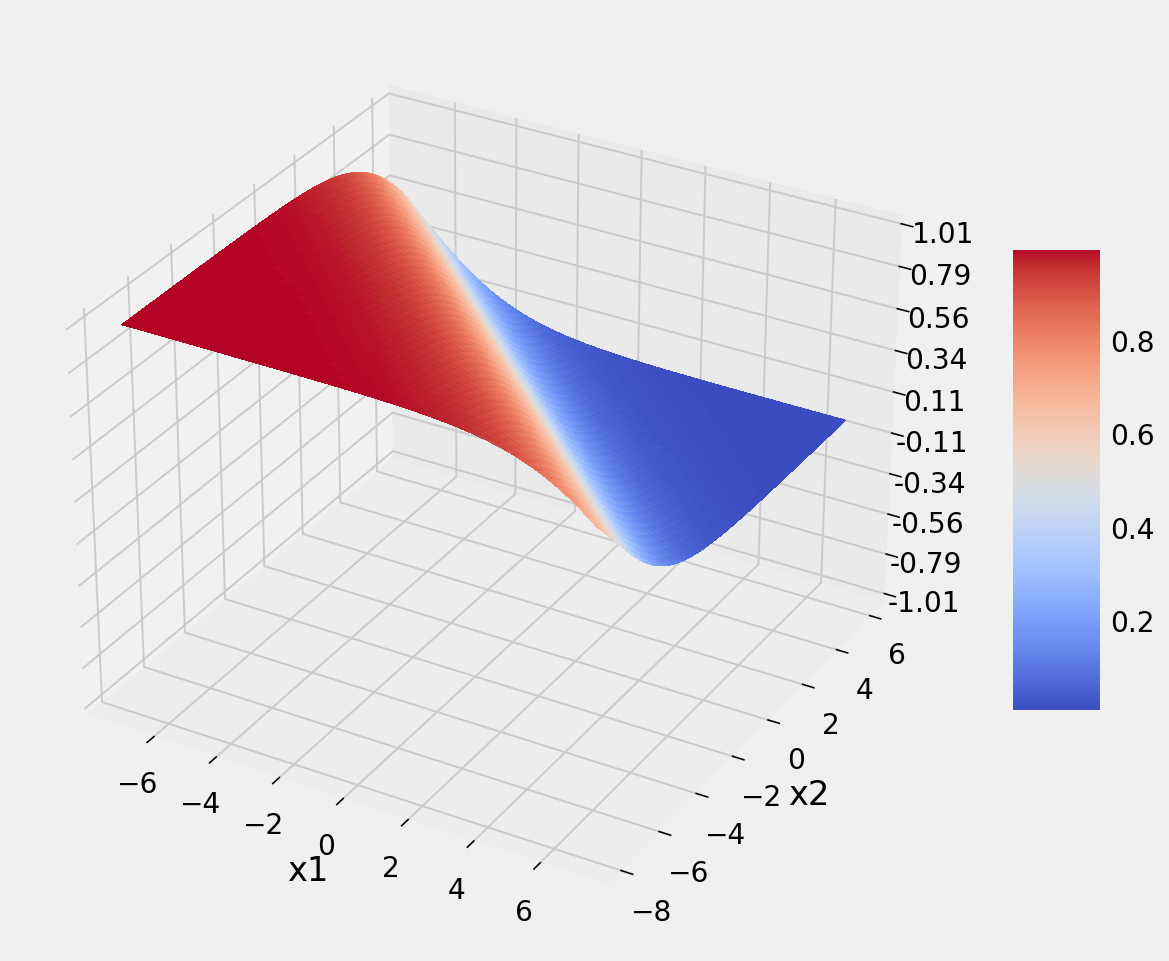

In [101]:

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(
    x1, x2, preds_final, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

/var/folders/8m/txdxnmy9723cpnbpsqf7jgpm0000gn/T/ipykernel_91151/1935670209.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(x1, x2, preds_final, cmap='RdBu')
/var/folders/8m/txdxnmy9723cpnbpsqf7jgpm0000gn/T/ipykernel_91151/1935670209.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(c, ax=ax)


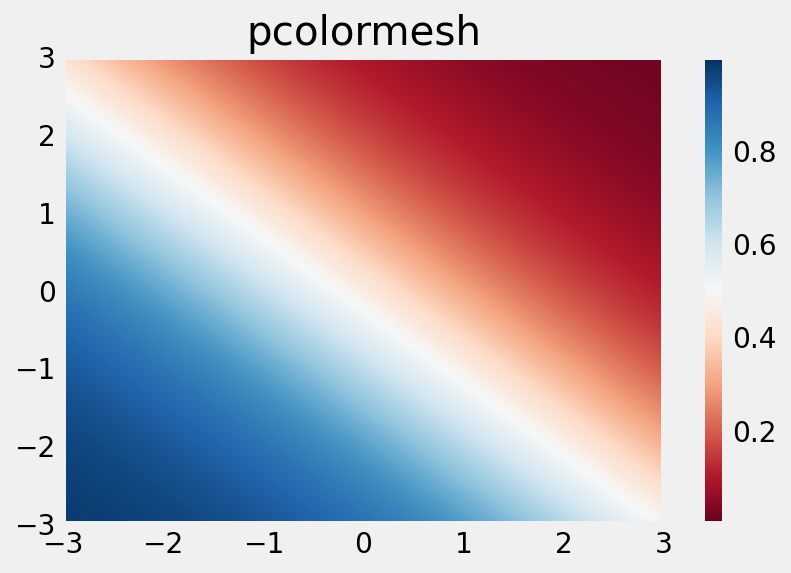

In [96]:


fig, ax = plt.subplots()

c = ax.pcolormesh(x1, x2, preds_final, cmap='RdBu')
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [45]:
xx.shape

(1, 200)

In [46]:
yy.shape

(200, 1)